# Unstructured Data Analytics HW1

## Name: Jhanvi Udani  

## Andrew ID: judani

Human or AI collaborators (if none, say "none"; do *not* leave this blank): **Used ChatGPT and Perplexity for some debugging. Exact code snippets where GenAI has been used have been denoted with a markdown.** 

Reminder: you should not be sharing code.

**Reminder:** As stated in Lecture 1, homework assignments this semester will be submitted as PDFs and, in particular, we will not be re-running your code. Please make sure that you have run all your code cells so that the code cell outputs are actually displayed. To save your Jupyter notebook as a PDF, we recommend simply using your browser's print functionality and using that to print/save the notebook as a PDF.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it (as a PDF, as stated above). Again, we will *not* be re-running your code.

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size (and when you save it as a PDF, the PDF will have a crazy number of pages).**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [3]:
########################################################################
######################### Write your code here #########################
########################################################################
import glob 

dataset_path = "HW1_Dataset/*.txt"

file_list = glob.glob(dataset_path)

for file_path in file_list:
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            print(f"{file_path} {len(text)}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
HW1_Dataset/The King James Version of the Bible (132).txt 4351846
HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241
HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
HW1_Dataset/The Odyssey by Homer (124).txt 697404
HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031
HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt 1154508
HW1_Dataset/The History of the

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [ ]:
########################################################################
######################### Write your code here #########################
########################################################################


# Reusing subpart i and modifying it for subpart ii: find top 15 longest books

# List to store (length, filename) tuples
lengths = []

for file_path in glob.glob(dataset_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            lengths.append((len(text), file_path))
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

lengths.sort(reverse=True)

for i, (length, filename) in enumerate(lengths[:15], start=1):
    print(f"{i}. {length} {filename}")

1. 5465100 HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 HW1_Dataset/The King James Version of the Bible (132).txt
3. 3254333 HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6. 2643849 HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 HW1_Dataset/Ulysses by James Joyce (282).txt
8. 1378627 HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11. 1214387 HW1_Dataset/The Republic by Plato (246).txt
12. 1200021 HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 HW1_Dataset/The Iliad by Homer (256).txt
14. 1167141 HW1_D

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [5]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [7]:
########################################################################
######################### Write your code here #########################
########################################################################

# Count total number of batches across all books
total_batches = 0
max_words_per_batch = 10000

for file_path in glob.glob(dataset_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            batches = split_into_batches(text, max_words_per_batch)
            total_batches += len(batches)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

print(f"Total number of batches: {total_batches}")

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [11]:
!pip install spacy


  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.21.0-py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 2.5 MB/s eta 0:00:00a 0:00:01
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
Using cached langcodes-3.5.0-py3-none-any.whl (182 kB)
Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
Using

In [12]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
########################################################################
######################### Write your code here #########################
########################################################################

import spacy, re, glob
from collections import Counter
import numpy as np

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def split_into_batches(text, max_words=10000):
    words = text.split()
    return [' '.join(words[i:i+max_words]) for i in range(0, len(words), max_words)]

lemma_freq = Counter()

for file_path in glob.glob(dataset_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        for batch in split_into_batches(file.read()):
            doc = nlp(batch)
            for token in doc:
                lemma = token.lemma_
                if re.match(r'^[a-zA-Z]+$', lemma):
                    lemma_freq[lemma] += 1

top_50 = lemma_freq.most_common(50)
for i, (lemma, freq) in enumerate(top_50, 1):
    print(f"{i}. {lemma} {freq}")


1. the 702470
2. be 436001
3. and 435424
4. of 386346
5. to 324396
6. I 255082
7. a 233465
8. in 204251
9. he 193665
10. that 159005
11. have 158749
12. it 135426
13. not 109288
14. his 108536
15. you 102592
16. with 101227
17. they 96825
18. for 95326
19. as 90730
20. she 78542
21. but 75598
22. my 73991
23. do 68718
24. at 64926
25. on 62851
26. by 61507
27. this 61242
28. we 60322
29. which 58868
30. all 58656
31. say 58324
32. from 50094
33. so 47999
34. or 47807
35. her 43051
36. one 41153
37. will 40928
38. man 39665
39. no 38391
40. their 38385
41. what 37851
42. there 37211
43. if 34897
44. go 33833
45. when 33587
46. an 32531
47. come 32258
48. see 32057
49. would 31301
50. who 30934


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

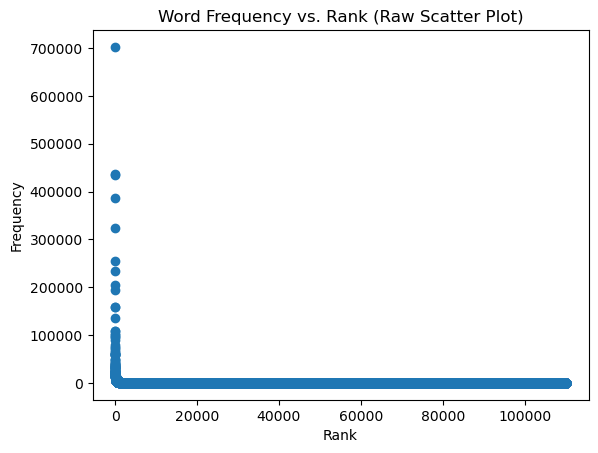

In [2]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
import matplotlib.pyplot as plt
import numpy as np

frequencies = [freq for _, freq in lemma_freq.most_common()]
ranks = np.arange(1, len(frequencies) + 1)

plt.figure()
plt.scatter(ranks, frequencies)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency vs. Rank (Raw Scatter Plot)")
plt.show()



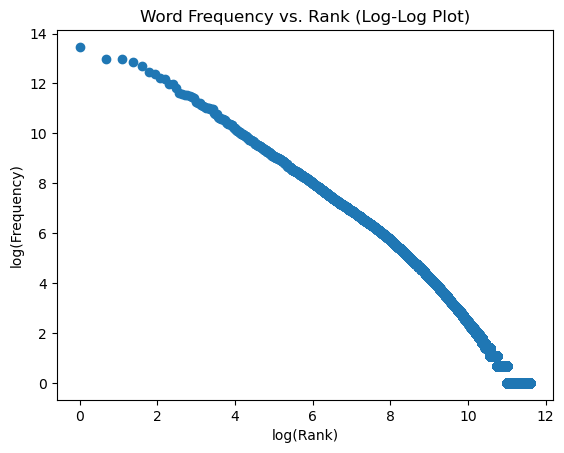

In [3]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################

plt.figure()
plt.scatter(np.log(ranks), np.log(frequencies))
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.title("Word Frequency vs. Rank (Log-Log Plot)")
plt.show()

***I used ChatGPT for plotting.***

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [2 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

The log-log plot displays an approximately linear trend with a negative slope, which is consistent with Zipf’s law. 

This means that word frequency follows a power-law distribution — higher frequency words occur significantly more than lower frequency words.



**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [4]:
########################################################################
######################### Write your code here #########################
########################################################################

########################################################################
######################### Write your code here #########################
########################################################################


top4 = sum(freq for _, freq in lemma_freq.most_common(4))
top50 = sum(freq for _, freq in lemma_freq.most_common(50))
total = sum(lemma_freq.values())

print("Top 4 Prob:", top4 / total)
print("Top 50 Prob:", top50 / total)

Top 4 Prob: 0.1622623108014011
Top 50 Prob: 0.48310825240805744


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [5]:
########################################################################
######################### Write your code here #########################
########################################################################

########################################################################
######################### Write your code here #########################
########################################################################

once = sum(1 for f in lemma_freq.values() if f == 1)
under_10 = sum(1 for f in lemma_freq.values() if f < 10)
unique = len(lemma_freq)

print("Proportion occurring once:", once / unique)
print("Proportion < 10:", under_10 / unique)


Proportion occurring once: 0.44788363874226633
Proportion < 10: 0.7814592399451263


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [6]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/jhanviudani/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

/opt/anaconda3/lib/python3.12/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


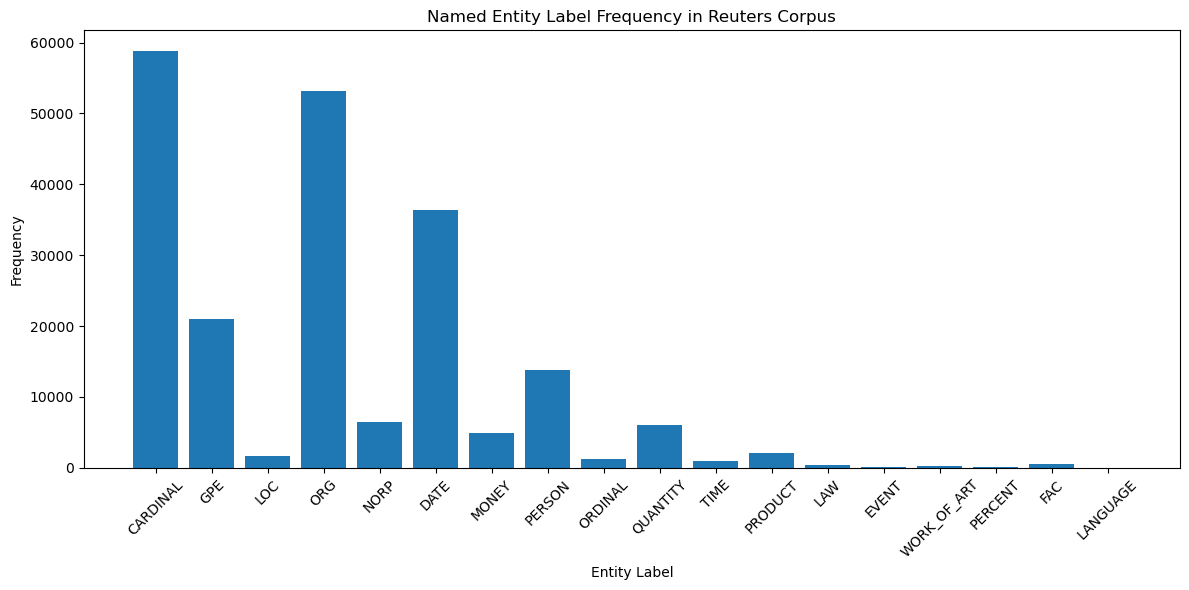

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub(r'\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

########################################################################
######################### Write your code here #########################
########################################################################

for doc in reuters_nlp:
    for ent in doc.ents:
        label_counter[ent.label_] += 1

plt.figure(figsize=(12, 6))
labels = list(label_counter.keys())
counts = [label_counter[label] for label in labels]

plt.bar(labels, counts)
plt.xlabel('Entity Label')
plt.ylabel('Frequency')
plt.title('Named Entity Label Frequency in Reuters Corpus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [9]:
########################################################################
######################### Write your code here #########################
########################################################################

from collections import Counter

org_doc_counter = Counter()
gpe_doc_counter = Counter()

for doc in reuters_nlp:
    seen_orgs = set()
    seen_gpes = set()

    for ent in doc.ents:
        entity = ent.text.lower()
        if ent.label_ == "ORG":
            seen_orgs.add(entity)
        elif ent.label_ == "GPE":
            seen_gpes.add(entity)

    for org in seen_orgs:
        org_doc_counter[org] += 1
    for gpe in seen_gpes:
        gpe_doc_counter[gpe] += 1

# Display top 10
print("Top 10 ORG Entities:")
for ent, count in org_doc_counter.most_common(10):
    print(f"{ent}: {count}")

print("\nTop 10 GPE Entities:")
for ent, count in gpe_doc_counter.most_common(10):
    print(f"{ent}: {count}")


Top 10 ORG Entities:
cts: 2886
cts net: 536
reuters: 443
net shr: 272
the securities and exchange commission: 249
ec: 238
fed: 223
treasury: 209
usda: 181
the u.s. agriculture department: 168

Top 10 GPE Entities:
u.s.: 1607
japan: 564
the united states: 380
u.k.: 302
canada: 287
new york: 255
west germany: 238
washington: 227
london: 202
brazil: 196


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [10]:
########################################################################
######################### Write your code here #########################
########################################################################

from collections import Counter
import numpy as np

gpe_docs = Counter()
gpe_opec_docs = Counter()
opec_docs = 0
total_docs = len(reuters_nlp)

for doc in reuters_nlp:
    gpes = {ent.text.lower() for ent in doc.ents if ent.label_ == 'GPE'}
    orgs = {ent.text.lower() for ent in doc.ents if ent.label_ == 'ORG'}

    if 'opec' in orgs:
        opec_docs += 1
        for gpe in gpes:
            gpe_opec_docs[gpe] += 1

    for gpe in gpes:
        gpe_docs[gpe] += 1

p_opec = opec_docs / total_docs
pmi = {}

for gpe in gpe_opec_docs:
    p_gpe = gpe_docs[gpe] / total_docs
    p_joint = gpe_opec_docs[gpe] / total_docs
    if p_gpe > 0 and p_joint > 0:
        pmi[gpe] = round(np.log(p_joint / (p_opec * p_gpe)), 4)

top_50 = sorted(pmi.items(), key=lambda x: x[1], reverse=True)[:50]
for gpe, score in top_50:
    print(f"{gpe}: {score}")


bpd: 4.4822
lajous: 4.4822
duri: 4.4822
trinidad-tobago: 4.4822
emirates: 4.4822
the lake charles: 4.4822
bethesda: 4.4822
franco-american: 4.4822
dd: 4.4822
dunham: 4.4822
gabon: 4.4822
el salado: 4.4822
aguarico: 4.4822
jubail: 4.4822
tripoli: 4.4822
doha: 4.4822
non-opec mexico: 4.4822
guayaquil: 4.4822
redoglia: 4.4822
java: 4.4822
carrington: 4.4822
materialy: 4.4822
vienna: 4.3196
riyadh: 4.259
saudi arabia's: 4.1075
quito: 4.0767
caracas: 3.9713
qatar: 3.9589
dubai: 3.9226
kahan: 3.789
petromin: 3.789
oseberg: 3.789
la: 3.789
new york harbor: 3.789
port jerome: 3.789
nigeria: 3.735
libya: 3.709
ecuador: 3.6937
saudi arabia: 3.6712
kuwait: 3.5884
the united arab emirates: 3.5128
venezuela: 3.4652
alexandria: 3.3836
kingdom: 3.3836
jakarta: 3.3836
jamaica: 3.2294
san antonio: 3.0959
gulf arab: 3.0959
lagos: 3.0959
the united states': 2.8727


***Used ChatGPT in the above code snippet to debug. I have not used it to write the whole block, but I was getting some warning, so I used GenAI to help me through it.***

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

The GPE entities with highest PMI scores ("opec") will most likely include countries with a significant role in oil production - like 'doha','riyadh', 'qatar','vienna' etc. 

Some entities are mis-classified - like 'bpd', 'petromin', 'franco-american','non-opec mexico' - they are not expected to be in the list. Since they still show up on the list - it could be a result of mis-classification by the model or their rare co-occurrence may be inflating the PMI score. 


## References: 
1. https://chatgpt.com/?model=gpt-4o
2. https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf
3. https://www.andrew.cmu.edu/user/georgech/95-865/

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/oS2Di1xCXvDCWWAD6